In [378]:
# load in required packages
import numpy as np
import pandas as pd
import geopandas as gpd
import shap
import re
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, cross_validate, GroupKFold, StratifiedGroupKFold, RepeatedKFold, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics, linear_model
from xgboost import XGBClassifier, XGBRegressor
import statsmodels.formula.api as smf
from datetime import datetime
import matplotlib.pyplot as plt
import os
import pickle
import seaborn as sns

cities_all=['Berlin','Dresden','Düsseldorf','Frankfurt am Main','Kassel','Leipzig','Magdeburg','Potsdam','Clermont','Dijon','Lille','Lyon','Montpellier','Nantes','Nimes','Paris','Toulouse','Madrid','Wien','France_other','Germany_other']
countries=['Germany','Germany','Germany','Germany','Germany','Germany','Germany','Germany','France','France','France','France','France','France','France','France','France','Spain','Austria','France','Germany']

In [394]:
city='All'

In [395]:
fp='../outputs/ML_Results/shap/mode_common_new/' + city + '.pkl'
with open(fp, 'rb') as f:
    shap_values=pickle.load(f)
fp='../outputs/ML_Results/shap/mode_common_new/' + city + '_df.pkl'
with open(fp, 'rb') as f:
    df=pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: '../outputs/ML_Results/shap/mode_common_new/All_df.pkl'

In [396]:
fp='../outputs/ML_Results/shap/mode_common_new/' + city + '_importance.pkl'
with open(fp, 'rb') as f:
    importance_df=pickle.load(f)

# importance_df['cont_pc']=100*importance_df['shap_importance']/importance_df['shap_importance'].sum()
# importance_df['Region']=city
# importance_all=importance_df.copy()

In [397]:
importance_df

,column_name,shap_importance
1,Trip_Distance,5.294659
43,Country_Germany,1.277302
0,CarOwnershipHH,0.853128
4,Age,0.710706
44,Country_Spain,0.704956
5,UrbPopDensity_res,0.643665
12,transit_accessibility_res,0.50983
3,Sex,0.476891
7,DistCenter_res,0.462959
42,Country_France,0.426407


In [312]:
def shap_car_imp(city):
    fp='../outputs/ML_Results/shap/mode_common_new/' + city + '.pkl'
    with open(fp, 'rb') as f:
        shap_values=pickle.load(f)
    fp='../outputs/ML_Results/shap/mode_common_new/' + city + '_df.pkl'
    with open(fp, 'rb') as f:
        df=pickle.load(f)
    X=df[[col for col in df.columns if "FeatureM" in col]]
    X_disp=[re.sub('FeatureM_','', x) for x in X.sort_index().columns]
    shap_values_abs=abs(shap_values[0])
    shap_sum = shap_values_abs.mean(axis=0)
    importance_df = pd.DataFrame([X_disp, shap_sum.tolist()]).T
    importance_df.columns = ['column_name', 'shap_importance']
    importance_df = importance_df.sort_values('shap_importance', ascending=False)
    importance_df['cont_pc']=100*importance_df['shap_importance']/importance_df['shap_importance'].sum()
    importance_df['Region']=city
    importance_df['Feature']=importance_df['column_name'].map(col_dict)
    return importance_df


In [269]:
importance_Wien=shap_car_imp('Wien')

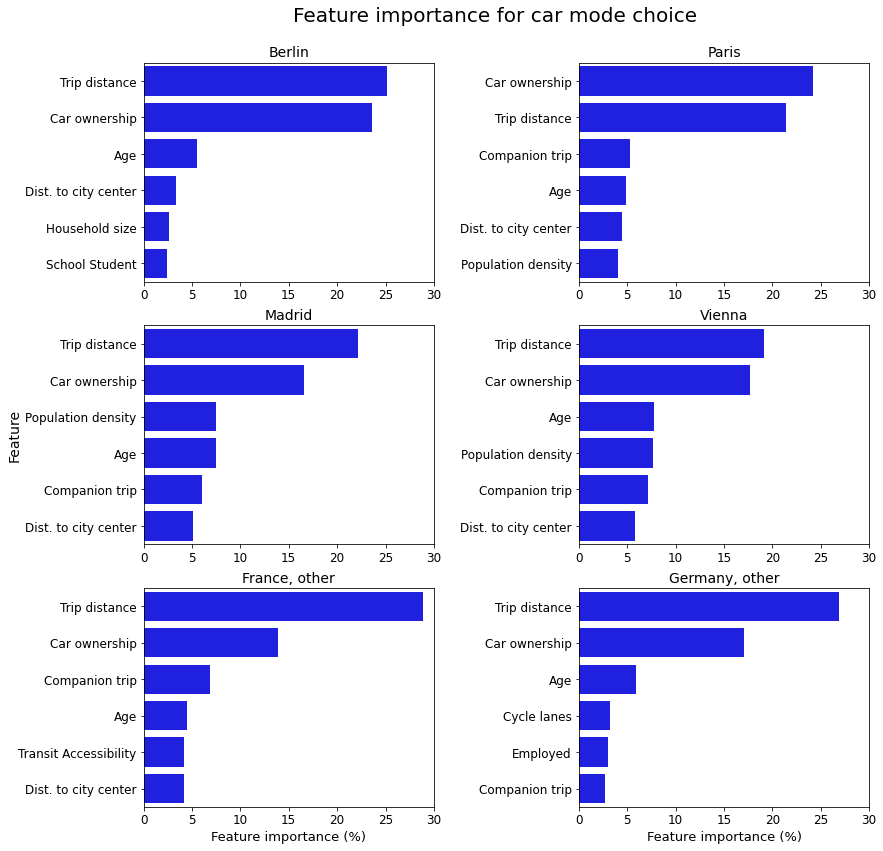

In [363]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(13,13))
plt.subplots_adjust(wspace=0.5,top=0.92)
fig.suptitle('Feature importance for car mode choice',fontsize=20)
for i in range(0,6):
    #print(i)
    tit=importance2[i]['Region'].unique()[0]
    tit=city_labels[i]
    plt.subplot(3,2,i+1)
    sns.barplot(data=importance2[i].iloc[:6,], x='cont_pc', y='Feature',color='blue');
    plt.xlim(0,30)
    plt.title(tit,fontsize=14)
    plt.ylabel('')
    plt.xlabel('Feature importance (%)',fontsize=13)
    plt.tick_params(axis='both', which='major', labelsize=12)
    if i<4:
        plt.xlabel('',fontsize=12)
    if i == 2:
        plt.ylabel('Feature',fontsize=14)

plt.savefig('../outputs/ML_Results/result_figures/mode_common_new/FI_car_all.png',facecolor='w',dpi=150,bbox_inches='tight')

In [338]:
city_labels=['Berlin','Paris','Madrid','Vienna','France, other','Germany, other']
city_labels[0]

'Berlin'

In [337]:
cities=pd.Series(['Berlin','Paris','Madrid','Wien','France_other','Germany_other'])
importance2=cities.apply(shap_car_imp)

In [204]:
importance_all = pd.concat([importance2[0], importance2[1],importance2[2],importance2[3],importance2[4],importance2[5]])
importance_all.groupby('column_name')['cont_pc'].sum().sort_values(ascending=False)

column_name
Trip_Distance                      143.602335
CarOwnershipHH                     112.898222
Age                                 36.001721
Trip_Purpose_Agg_Home↔Companion     29.361301
UrbPopDensity_res                   27.609502
DistCenter_res                      25.164259
Occupation_Employed_FullTime        15.939749
transit_accessibility_res           14.166524
bike_lane_share_res                  13.52589
HHSize                              13.353487
street_length_res                   11.626081
DistSubcenter_res                   11.235917
LU_Comm_res                         10.497619
Sex                                  9.661305
LU_UrbFab_res                        9.178227
Trip_Purpose_Agg_Home↔School         8.806332
Trip_Purpose_Agg_Home↔Shopping       8.446759
Trip_Purpose_Agg_Home↔Work           8.312815
Occupation_Student_School            7.548812
Trip_Purpose_Agg_Home↔Leisure        6.636299
UrbBuildDensity_res                  6.211323
Education_University  

In [190]:
X_disp=[re.sub('FeatureM_','', x) for x in X.sort_index().columns]
shap_values_abs=abs(shap_values[0])
shap_sum = shap_values_abs.mean(axis=0)
importance_df = pd.DataFrame([X_disp, shap_sum.tolist()]).T
importance_df.columns = ['column_name', 'shap_importance']
importance_df = importance_df.sort_values('shap_importance', ascending=False)
importance_df

,column_name,shap_importance
1,Trip_Distance,0.527294
0,CarOwnershipHH,0.486079
4,Age,0.212572
5,UrbPopDensity_res,0.210309
21,Trip_Purpose_Agg_Home↔Companion,0.195327
7,DistCenter_res,0.15859
9,bike_lane_share_res,0.093452
10,LU_Comm_res,0.072331
2,HHSize,0.070659
16,Trip_Time_PM Rush,0.064156


In [105]:
# feature_name='FeatureM_Trip_Distance'
# feature_label='Trip Distance (km)'
# feature_name='FeatureM_Age'
# feature_label='Age'

# feature_name='FeatureM_UrbPopDensity_origin'
# feature_label='Population Density'
# feature_name='FeatureM_DistCenter_origin'
# feature_label='Dist. to city center (km)'

def get_df(feature_name,feature_label):

    df_combine=pd.DataFrame(columns=['City','Feature','Mode','Feature_value','Shap_y','Zero'])

    for city in ['Berlin','France_other','Germany_other','Madrid','Paris','Wien']: #  
        print(city)

        fp='../outputs/ML_Results/shap/mode_common_new/' + city + '_df.pkl'
        with open(fp, 'rb') as f:
            df=pickle.load(f)
        target = 'Mode_num'

        X=df[[col for col in df.columns if "FeatureM" in col]]
        y = df[target]
        fp='../outputs/ML_Results/shap/mode_common_new/' + city + '.pkl'
        with open(fp, 'rb') as f:
            shap_values=pickle.load(f)

        fp='../outputs/ML_Results/shap/mode_common_new/' + city + '_importance.pkl'
        with open(fp, 'rb') as f:
            importance_df=pickle.load(f)
        X_disp=[re.sub('FeatureM_','', x) for x in X.sort_index().columns]
        col_dict= {'DistCenter_origin':'Dist. to city center','DistSubcenter_origin':'Dist. to subenter', 'UrbPopDensity_origin':'Population density','UrbBuildDensity_origin':'Built-up density','ParkingAvailable_Dest':'Parking available',
            'IntersecDensity_origin':'Intersection density','LU_Comm_origin':'Commercial area','LU_UrbFab_origin':'Urban Fabric area','street_length_origin':'Avg. street length','bike_lane_share_origin':'Cycle lanes',
            'Trip_Purpose_Agg_Home↔Work':'Commute trip', 'Trip_Purpose_Agg_Home↔Companion':'Companion trip', 'TravelAlone':'Solo trip','Trip_Purpose_Agg_Home↔Leisure':'Leisure trip','Trip_Purpose_Agg_Home↔Shopping':'Shopping trip','Trip_Purpose_Agg_Home↔School':'School trip',
            'Trip_Time_Evening':'Evening trip','Trip_Time_AM_Rush':'Morning trip',
            'Season_Winter':'Winter season','MeanTime2Transit_origin':'Time to transit', 'transit_accessibility_origin':'Transit accessibility',
            'Trip_Distance':'Trip distance','CarOwnershipHH':'Car ownership','Occupation_Student_School':'School Student',
            'Age':'Age','Sex':'Sex','HHSize':'Household size','IncomeDescriptiveNumeric':'Income','IncomeDetailed_Numeric':'Income',
            'Education_University':'University education', 'Occupation_Employed_FullTime':'Employed'}
        X_lab=[*map(col_dict.get, X_disp)]

        i=X.columns.get_loc(feature_name)

        car=shap_values[0]
        walk=shap_values[2]
        bike=shap_values[1]
        trans=shap_values[3]
        count_thres=1
        if feature_name=='FeatureM_Age': count_thres=79
        #if feature_name=='FeatureM_Trip_Distance': count_thres=19


        # first for car trips
        values=car[:,i]
        data=X.sort_index().iloc[:,i]
        xmean=[]
        ymean=[]
        y0=[]

        dftemp=pd.DataFrame({'d':data,'v':values})
        dftemp=dftemp.groupby('d')['v'].mean().reset_index()
        dftemp['v0']=0
        xmean.append(dftemp['d'].values)
        ymean.append(dftemp['v'].values)
        y0.append(dftemp['v0'].values) 

        x=xmean[0]
        y1=y0[0]
        y2=ymean[0]
        xn=pd.DataFrame(X[feature_name].value_counts())
        xn.reset_index(inplace=True)
        xn.rename(columns={'index':feature_label,feature_name:'count'},inplace=True)

        df_mode_feature=pd.DataFrame({'City':city,'Feature':feature_name.replace('FeatureM_',''),'Mode':'Car','Feature_value':x,'Shap_y':y2,'Zero':0})

        df_mode_feature=df_mode_feature.merge(xn,left_on='Feature_value',right_on=feature_label)
        df_mode_feature.drop(columns=feature_label,inplace=True)
        df_mode_feature=df_mode_feature.loc[df_mode_feature['count']>count_thres,]
        #df_mode_feature=pd.DataFrame({'City':city,'Feature':feature_name.replace('FeatureM_',''),'Mode':'Car','Feature_value':x,'Shap_y':y2,'Zero':0})
        df_combine=pd.concat([df_combine,df_mode_feature])

        # then bike trips
        values=bike[:,i]
        data=X.sort_index().iloc[:,i]
        xmean=[]
        ymean=[]
        y0=[]


        dftemp=pd.DataFrame({'d':data,'v':values})
        dftemp=dftemp.groupby('d')['v'].mean().reset_index()
        dftemp['v0']=0
        xmean.append(dftemp['d'].values)
        ymean.append(dftemp['v'].values)
        y0.append(dftemp['v0'].values)

        x=xmean[0]
        y1=y0[0]
        y2=ymean[0]
        xn=pd.DataFrame(X[feature_name].value_counts())
        xn.reset_index(inplace=True)
        xn.rename(columns={'index':feature_label,feature_name:'count'},inplace=True)

        df_mode_feature=pd.DataFrame({'City':city,'Feature':feature_name.replace('FeatureM_',''),'Mode':'Bike','Feature_value':x,'Shap_y':y2,'Zero':0})

        df_mode_feature=df_mode_feature.merge(xn,left_on='Feature_value',right_on=feature_label)
        df_mode_feature.drop(columns=feature_label,inplace=True)
        df_mode_feature=df_mode_feature.loc[df_mode_feature['count']>count_thres,]
        df_combine=pd.concat([df_combine,df_mode_feature])

        # then foot trips
        values=walk[:,i]
        data=X.sort_index().iloc[:,i]
        xmean=[]
        ymean=[]
        y0=[]

        dftemp=pd.DataFrame({'d':data,'v':values})
        dftemp=dftemp.groupby('d')['v'].mean().reset_index()
        dftemp['v0']=0
        xmean.append(dftemp['d'].values)
        ymean.append(dftemp['v'].values)
        y0.append(dftemp['v0'].values)

        x=xmean[0]
        y1=y0[0]
        y2=ymean[0]
        xn=pd.DataFrame(X[feature_name].value_counts())
        xn.reset_index(inplace=True)
        xn.rename(columns={'index':feature_label,feature_name:'count'},inplace=True)

        df_mode_feature=pd.DataFrame({'City':city,'Feature':feature_name.replace('FeatureM_',''),'Mode':'Foot','Feature_value':x,'Shap_y':y2,'Zero':0})

        df_mode_feature=df_mode_feature.merge(xn,left_on='Feature_value',right_on=feature_label)
        df_mode_feature.drop(columns=feature_label,inplace=True)
        df_mode_feature=df_mode_feature.loc[df_mode_feature['count']>count_thres,]
        df_combine=pd.concat([df_combine,df_mode_feature])

        # then transit trips
        values=trans[:,i]
        data=X.sort_index().iloc[:,i]
        xmean=[]
        ymean=[]
        y0=[]


        dftemp=pd.DataFrame({'d':data,'v':values})
        dftemp=dftemp.groupby('d')['v'].mean().reset_index()
        dftemp['v0']=0
        xmean.append(dftemp['d'].values)
        ymean.append(dftemp['v'].values)
        y0.append(dftemp['v0'].values)
        x=xmean[0]
        y1=y0[0]
        y2=ymean[0]

        xn=pd.DataFrame(X[feature_name].value_counts())
        xn.reset_index(inplace=True)
        xn.rename(columns={'index':feature_label,feature_name:'count'},inplace=True)

        df_mode_feature=pd.DataFrame({'City':city,'Feature':feature_name.replace('FeatureM_',''),'Mode':'Transit','Feature_value':x,'Shap_y':y2,'Zero':0})

        df_mode_feature=df_mode_feature.merge(xn,left_on='Feature_value',right_on=feature_label)
        df_mode_feature.drop(columns=feature_label,inplace=True)
        df_mode_feature=df_mode_feature.loc[df_mode_feature['count']>count_thres,]

        df_combine=pd.concat([df_combine,df_mode_feature])

        df_combine.reset_index(inplace=True,drop=True)
        df_combine['City'].replace('Wien','Vienna',inplace=True)
        df_combine['City'].replace('France_other','France, other',inplace=True)
        df_combine['City'].replace('Germany_other','Germany, other',inplace=True)
        df_combine['Feature_value']=df_combine['Feature_value'].astype(float)
        df_combine=df_combine.loc[df_combine['Mode']=='Car',:]


    return df_combine

In [106]:
df_tripd=get_df('FeatureM_Trip_Distance','Trip Distance (km)')
df_d2c=get_df('FeatureM_DistCenter_res','Dist. to Center')
df_pdens=get_df('FeatureM_UrbPopDensity_res','Urb. Pop. Density')
df_age=get_df('FeatureM_Age','Age')
df_carown=get_df('FeatureM_CarOwnershipHH','Car Ownership')
df_comp_trip=get_df('FeatureM_Trip_Purpose_Agg_Home↔Companion','Companion Trip')

Berlin
France_other
Germany_other
Madrid
Paris
Wien
Berlin
France_other
Germany_other
Madrid
Paris
Wien
Berlin
France_other
Germany_other
Madrid
Paris
Wien
Berlin
France_other
Germany_other
Madrid
Paris
Wien
Berlin
France_other
Germany_other
Madrid
Paris
Wien
Berlin
France_other
Germany_other
Madrid
Paris
Wien


In [144]:
df_mean_carown=pd.DataFrame(df_carown.groupby(['City','Feature','Mode','Feature_value'])['Shap_y'].mean())
df_mean_carown.reset_index(inplace=True)
df_mean_carown['Zero']=0

df_mean_comp=pd.DataFrame(df_comp_trip.groupby(['City','Feature','Mode','Feature_value'])['Shap_y'].mean())
df_mean_comp.reset_index(inplace=True)
df_mean_comp['Zero']=0
df_mean_comp

,City,Feature,Mode,Feature_value,Shap_y,Zero
0,Berlin,Trip_Purpose_Agg_Home↔Companion,Car,0.0,-0.024204,0
1,Berlin,Trip_Purpose_Agg_Home↔Companion,Car,1.0,0.118909,0
2,"France, other",Trip_Purpose_Agg_Home↔Companion,Car,0.0,-0.126628,0
3,"France, other",Trip_Purpose_Agg_Home↔Companion,Car,1.0,0.859958,0
4,"Germany, other",Trip_Purpose_Agg_Home↔Companion,Car,0.0,-0.060722,0
5,"Germany, other",Trip_Purpose_Agg_Home↔Companion,Car,1.0,0.497474,0
6,Madrid,Trip_Purpose_Agg_Home↔Companion,Car,0.0,-0.075876,0
7,Madrid,Trip_Purpose_Agg_Home↔Companion,Car,1.0,0.686433,0
8,Paris,Trip_Purpose_Agg_Home↔Companion,Car,0.0,-0.095396,0
9,Paris,Trip_Purpose_Agg_Home↔Companion,Car,1.0,0.550660,0


<AxesSubplot:title={'center':'Companion Trip'}, xlabel='Companion Trip', ylabel='SHAP (mode Prob.)'>

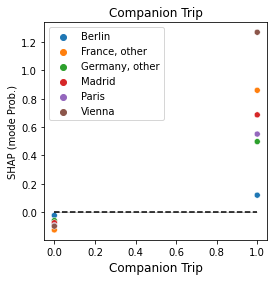

In [167]:
ax3 = plt.subplots(1,1, figsize=(4,4))
#sns.lineplot(data=df_mean_carown, x='Feature_value', y='Shap_y', hue='City').set(title='Car Ownership', ylabel='SHAP (mode Prob.)')
sns.scatterplot(data=df_mean_comp, x='Feature_value', y='Shap_y', hue='City').set(title='Companion Trip', ylabel='SHAP (mode Prob.)')
plt.xlabel('Companion Trip',fontsize=12)
#plt.title('Car',fontsize=14)
sns.lineplot(data=df_mean_comp, x='Feature_value', y='Zero',color='black',linestyle='dashed')

<AxesSubplot:title={'center':'Car Ownership'}, xlabel='Car Ownership', ylabel='SHAP (mode Prob.)'>

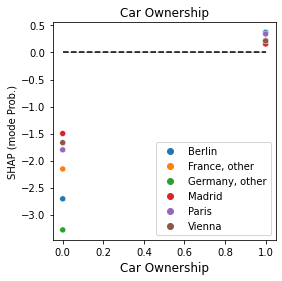

In [166]:
ax3 = plt.subplots(1,1, figsize=(4,4))
#sns.lineplot(data=df_mean_carown, x='Feature_value', y='Shap_y', hue='City').set(title='Car Ownership', ylabel='SHAP (mode Prob.)')
sns.scatterplot(data=df_mean_carown, x='Feature_value', y='Shap_y', hue='City').set(title='Car Ownership', ylabel='SHAP (mode Prob.)')
plt.xlabel('Car Ownership',fontsize=12)
#plt.title('Car',fontsize=14)
sns.lineplot(data=df_mean_carown, x='Feature_value', y='Zero',color='black',linestyle='dashed')
#ax3.get_legend().remove()
#ax3.set(ylim=(-1.8, 1.8))

Text(0.5, 0, 'Car Ownership')

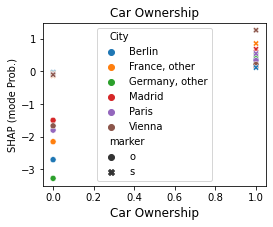

In [161]:
ax3 = plt.subplots(1,1, figsize=(4,3))
sns.scatterplot(data=df_cat, x='Feature_value', y='Shap_y', hue='City',style=df_cat['marker']).set(title='Car Ownership', ylabel='SHAP (mode Prob.)')
plt.xlabel('Car Ownership',fontsize=12)
#plt.title('Car',fontsize=14)
#sns.lineplot(data=df_cat, x='Feature_value', y='Zero',color='black',linestyle='dashed')

In [107]:
# summarise by binned values, # trip distance
df_tripd_summ=df_tripd.copy()
df_tripd_summ['Group'] = pd.cut(df_tripd_summ['Feature_value'], bins=25)
df_tripd_summ['Group_mid']=[f.mid for f in df_tripd_summ['Group']]

l=pd.DataFrame(df_tripd_summ[['City','Group_mid']].value_counts())
l.reset_index(inplace=True)
l.rename(columns={0:'Group_count'},inplace=True)

df_tripd_summ=pd.merge(df_tripd_summ,l,on=['City','Group_mid'])
df_tripd_summ=df_tripd_summ.loc[df_tripd_summ['Group_count']>10,]

# get mean values per bin
df_mean_tripd=pd.DataFrame(df_tripd_summ.groupby(['City','Feature','Mode','Group_mid'])['Shap_y'].mean())
df_mean_tripd.reset_index(inplace=True)
df_mean_tripd['Zero']=0
df_mean_tripd['Group_mid']=0.001*df_mean_tripd['Group_mid']
df_mean_tripd

,City,Feature,Mode,Group_mid,Shap_y,Zero
0,Berlin,Trip_Distance,Car,1.024025,-1.465725,0
1,Berlin,Trip_Distance,Car,3.047000,0.272770,0
2,Berlin,Trip_Distance,Car,5.045000,0.532414,0
3,Berlin,Trip_Distance,Car,7.043000,0.584192,0
4,Berlin,Trip_Distance,Car,9.041000,0.590265,0
...,...,...,...,...,...,...
70,Vienna,Trip_Distance,Car,3.047000,0.014159,0
71,Vienna,Trip_Distance,Car,5.045000,0.048363,0
72,Vienna,Trip_Distance,Car,7.043000,-0.059813,0
73,Vienna,Trip_Distance,Car,9.041000,0.238331,0


In [233]:
df_mean_carown

,City,Feature,Mode,Feature_value,Shap_y,Zero
0,Berlin,CarOwnershipHH,Car,0.0,-2.707937,0
1,Berlin,CarOwnershipHH,Car,1.0,0.374821,0
2,"France, other",CarOwnershipHH,Car,0.0,-2.155277,0
3,"France, other",CarOwnershipHH,Car,1.0,0.228542,0
4,"Germany, other",CarOwnershipHH,Car,0.0,-3.283194,0
5,"Germany, other",CarOwnershipHH,Car,1.0,0.213375,0
6,Madrid,CarOwnershipHH,Car,0.0,-1.499210,0
7,Madrid,CarOwnershipHH,Car,1.0,0.157553,0
8,Paris,CarOwnershipHH,Car,0.0,-1.801282,0
9,Paris,CarOwnershipHH,Car,1.0,0.343341,0


In [400]:
df_mean_pdens['Group_mid']=0.01*df_mean_pdens['Group_mid']

In [402]:
df_mean_pdens

,City,Feature,Mode,Group_mid,Shap_y,Zero
0,Berlin,UrbPopDensity_res,Car,13.100730,0.092699,0
1,Berlin,UrbPopDensity_res,Car,38.828835,0.017046,0
2,Berlin,UrbPopDensity_res,Car,64.239305,0.033650,0
3,Berlin,UrbPopDensity_res,Car,89.649775,0.012343,0
4,Berlin,UrbPopDensity_res,Car,115.060245,-0.062262,0
...,...,...,...,...,...,...
73,Vienna,UrbPopDensity_res,Car,140.470715,-0.278507,0
74,Vienna,UrbPopDensity_res,Car,165.881185,-0.288695,0
75,Vienna,UrbPopDensity_res,Car,191.291655,-0.307825,0
76,Vienna,UrbPopDensity_res,Car,216.702125,-0.280920,0


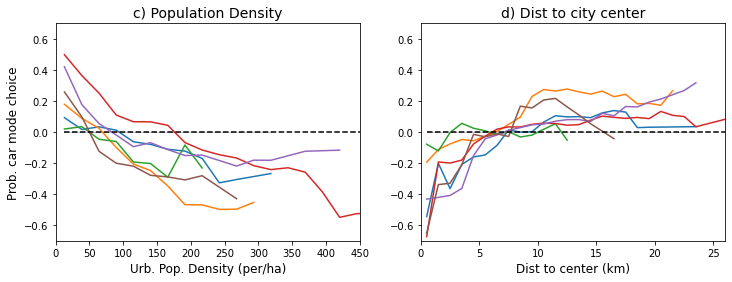

In [413]:
fig,(ax0,ax1) = plt.subplots(1,2, figsize=(12,4))

sns.lineplot(ax=ax0,data=df_mean_pdens, x='Group_mid', y='Shap_y', hue='City')
sns.lineplot(ax=ax0,data=df_mean_pdens, x='Group_mid', y='Zero',color='black',linestyle='dashed')
ax0.set_xlim(0, 450);
ax0.set_ylim(-.7, .7);
ax0.set_xlabel('Urb. Pop. Density (per/ha)',fontsize=12)
ax0.set_ylabel('Prob. car mode choice',fontsize=12)
ax0.set_title('c) Population Density',fontsize=14)
ax0.get_legend().remove()

sns.lineplot(ax=ax1,data=df_mean_d2c, x='Group_mid', y='Shap_y', hue='City')
sns.lineplot(ax=ax1,data=df_mean_d2c, x='Group_mid', y='Zero',color='black',linestyle='dashed')
ax1.set_xlim(0, 26);
ax1.set_ylim(-.7, .7);
ax1.set_xlabel('Dist to center (km)',fontsize=12)
ax1.set_ylabel('',fontsize=12)
ax1.set_title('d) Dist to city center',fontsize=14)
ax1.get_legend().remove()
plt.savefig('../outputs/ML_Results/result_figures/mode_common_new/car_nonlin2.png',facecolor='w',dpi=150,bbox_inches='tight')

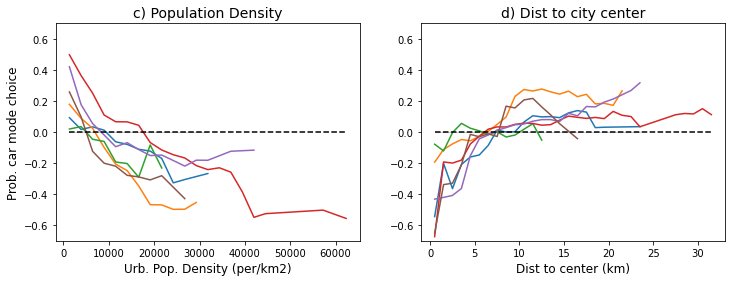

In [377]:
fig,(ax0,ax1) = plt.subplots(1,2, figsize=(12,4))

sns.lineplot(ax=ax0,data=df_mean_pdens, x='Group_mid', y='Shap_y', hue='City')
sns.lineplot(ax=ax0,data=df_mean_pdens, x='Group_mid', y='Zero',color='black',linestyle='dashed')
#ax0.set_ylim(-1.7, 1.7);
ax0.set_ylim(-.7, .7);
ax0.set_xlabel('Urb. Pop. Density (per/km2)',fontsize=12)
ax0.set_ylabel('Prob. car mode choice',fontsize=12)
ax0.set_title('c) Population Density',fontsize=14)
ax0.get_legend().remove()

sns.lineplot(ax=ax1,data=df_mean_d2c, x='Group_mid', y='Shap_y', hue='City')
sns.lineplot(ax=ax1,data=df_mean_d2c, x='Group_mid', y='Zero',color='black',linestyle='dashed')
#ax1.set_ylim(-1.7, 1.7);
ax1.set_ylim(-.7, .7);
ax1.set_xlabel('Dist to center (km)',fontsize=12)
ax1.set_ylabel('',fontsize=12)
ax1.set_title('d) Dist to city center',fontsize=14)
ax1.get_legend().remove()
plt.savefig('../outputs/ML_Results/result_figures/mode_common_new/car_nonlin2.png',facecolor='w',dpi=150,bbox_inches='tight')

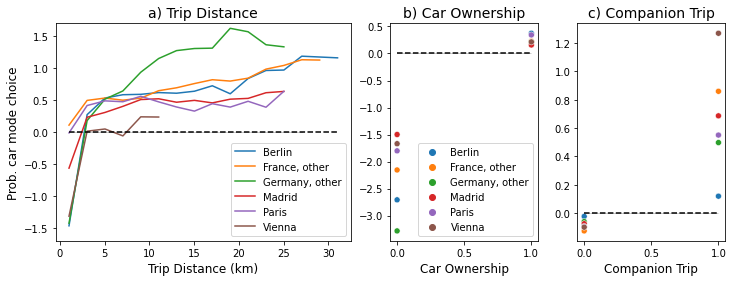

In [254]:
#ax3 = plt.subplot(111)
fig,(ax0,ax1,ax2) = plt.subplots(1,3, figsize=(12,4),gridspec_kw={'width_ratios': [2, 1,1]})

sns.lineplot(ax=ax0,data=df_mean_tripd, x='Group_mid', y='Shap_y', hue='City').set(title='Trip Distance', ylabel='SHAP (mode Prob.)')
sns.lineplot(ax=ax0,data=df_mean_tripd, x='Group_mid', y='Zero',color='black',linestyle='dashed')
ax0.set_ylim(-1.7, 1.7);
ax0.set_xlabel('Trip Distance (km)',fontsize=12)
ax0.set_ylabel('Prob. car mode choice',fontsize=12)
ax0.set_title('a) Trip Distance',fontsize=14)

sns.scatterplot(ax=ax1,data=df_mean_carown, x='Feature_value', y='Shap_y', hue='City')
sns.lineplot(ax=ax1,data=df_mean_carown, x='Feature_value', y='Zero',color='black',linestyle='dashed')
#ax0.set_ylim(-1.8, 1.8);
ax1.set_xlabel('Car Ownership',fontsize=12)
ax1.set_ylabel('',fontsize=12)
ax1.set_title('b) Car Ownership',fontsize=14)
#ax1.get_legend().remove()

sns.scatterplot(ax=ax2,data=df_mean_comp, x='Feature_value', y='Shap_y', hue='City')
sns.lineplot(ax=ax2,data=df_mean_comp, x='Feature_value', y='Zero',color='black',linestyle='dashed')
#ax0.set_ylim(-1.8, 1.8);
ax2.set_xlabel('Companion Trip',fontsize=12)
ax2.set_ylabel('',fontsize=12)
ax2.set_title('c) Companion Trip',fontsize=14)
ax2.get_legend().remove()
plt.savefig('../outputs/ML_Results/result_figures/mode_common_new/car_nonlin1.png',facecolor='w',dpi=150,bbox_inches='tight')

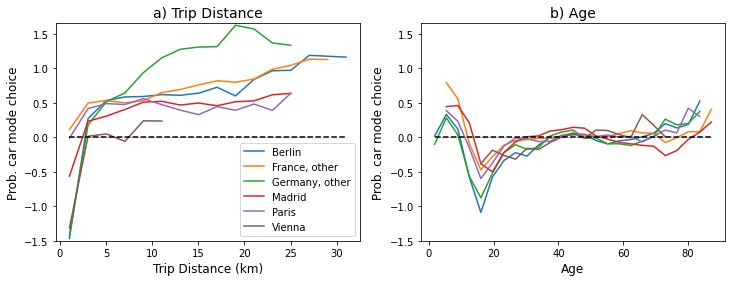

In [373]:
fig,(ax0,ax1) = plt.subplots(1,2, figsize=(12,4))

sns.lineplot(ax=ax0,data=df_mean_tripd, x='Group_mid', y='Shap_y', hue='City')
sns.lineplot(ax=ax0,data=df_mean_tripd, x='Group_mid', y='Zero',color='black',linestyle='dashed')
ax0.set_ylim(-1.5, 1.65);
ax0.set_xlabel('Trip Distance (km)',fontsize=12)
ax0.set_ylabel('Prob. car mode choice',fontsize=12)
ax0.set_title('a) Trip Distance',fontsize=14)

sns.lineplot(ax=ax1,data=df_mean_age, x='Group_mid', y='Shap_y', hue='City')
sns.lineplot(ax=ax1,data=df_mean_age, x='Group_mid', y='Zero',color='black',linestyle='dashed')
ax1.set_ylim(-1.5, 1.65);
ax1.set_xlabel('Age',fontsize=12)
ax1.set_ylabel('Prob. car mode choice',fontsize=12)
ax1.set_title('b) Age',fontsize=14)
ax1.get_legend().remove()

# sns.scatterplot(ax=ax1,data=df_mean_carown, x='Feature_value', y='Shap_y', hue='City')
# sns.lineplot(ax=ax1,data=df_mean_carown, x='Feature_value', y='Zero',color='black',linestyle='dashed')
# #ax0.set_ylim(-1.8, 1.8);
# ax1.set_xlabel('Car Ownership',fontsize=12)
# ax1.set_ylabel('',fontsize=12)
# ax1.set_title('b) Car Ownership',fontsize=14)
# #ax1.get_legend().remove()

# sns.scatterplot(ax=ax2,data=df_mean_comp, x='Feature_value', y='Shap_y', hue='City')
# sns.lineplot(ax=ax2,data=df_mean_comp, x='Feature_value', y='Zero',color='black',linestyle='dashed')
# #ax0.set_ylim(-1.8, 1.8);
# ax2.set_xlabel('Companion Trip',fontsize=12)
# ax2.set_ylabel('',fontsize=12)
# ax2.set_title('c) Companion Trip',fontsize=14)
# ax2.get_legend().remove()
plt.savefig('../outputs/ML_Results/result_figures/mode_common_new/car_nonlin11.png',facecolor='w',dpi=150,bbox_inches='tight')

In [ ]:
fig,ax3 = plt.subplots(1,2, figsize=(6,4))
sns.lineplot(data=df_mean_tripd, x='Group_mid', y='Shap_y', hue='City').set(title='Trip Distance', ylabel='SHAP (mode Prob.)')
plt.xlabel('Trip Distance (km)',fontsize=12)
#plt.title('Car',fontsize=14)
sns.lineplot(data=df_mean_tripd, x='Group_mid', y='Zero',color='black',linestyle='dashed')
#ax3.get_legend().remove()
ax3.set_ylim(-1.8, 1.8);

In [128]:
# summarise by binned values, # d2c
b=[w for w in range(0,40,1)]

df_d2c_summ=df_d2c.copy()
df_d2c_summ['Group'] = pd.cut(df_d2c_summ['Feature_value'], bins=b)
df_d2c_summ['Group_mid']=[f.mid for f in df_d2c_summ['Group']]

l=pd.DataFrame(df_d2c_summ[['City','Group_mid']].value_counts())
l.reset_index(inplace=True)
l.rename(columns={0:'Group_count'},inplace=True)

df_d2c_summ=pd.merge(df_d2c_summ,l,on=['City','Group_mid'])
#df_d2c_summ=df_d2c_summ.loc[df_d2c_summ['Group_count']>4,]

# get mean values per bin
df_mean_d2c=pd.DataFrame(df_d2c_summ.groupby(['City','Feature','Mode','Group_mid'])['Shap_y'].mean())
df_mean_d2c.reset_index(inplace=True)
df_mean_d2c['Zero']=0
df_mean_d2c

,City,Feature,Mode,Group_mid,Shap_y,Zero
0,Berlin,DistCenter_res,Car,0.5,-0.544271,0
1,Berlin,DistCenter_res,Car,1.5,-0.201471,0
2,Berlin,DistCenter_res,Car,2.5,-0.364227,0
3,Berlin,DistCenter_res,Car,3.5,-0.208648,0
4,Berlin,DistCenter_res,Car,4.5,-0.160312,0
...,...,...,...,...,...,...
119,Vienna,DistCenter_res,Car,11.5,0.216904,0
120,Vienna,DistCenter_res,Car,12.5,0.161934,0
121,Vienna,DistCenter_res,Car,13.5,0.110545,0
122,Vienna,DistCenter_res,Car,14.5,0.053974,0


[(-1.0, 1.0)]

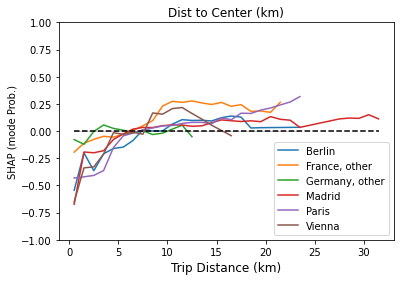

In [130]:
ax3 = plt.subplot(111)
sns.lineplot(data=df_mean_d2c, x='Group_mid', y='Shap_y', hue='City').set(title='Dist to Center (km)', ylabel='SHAP (mode Prob.)')
plt.xlabel('Trip Distance (km)',fontsize=12)
#plt.title('Car',fontsize=14)
sns.lineplot(data=df_mean_d2c, x='Group_mid', y='Zero',color='black',linestyle='dashed')
#ax3.get_legend().remove()
ax3.set(ylim=(-1, 1))

In [132]:
# summarise by binned values, # age
df_age_summ=df_age.copy()
df_age_summ['Group'] = pd.cut(df_age_summ['Feature_value'], bins=25)
df_age_summ['Group_mid']=[f.mid for f in df_age_summ['Group']]

l=pd.DataFrame(df_age_summ[['City','Group_mid']].value_counts())
l.reset_index(inplace=True)
l.rename(columns={0:'Group_count'},inplace=True)

df_age_summ=pd.merge(df_age_summ,l,on=['City','Group_mid'])
#df_d2c_summ=df_d2c_summ.loc[df_d2c_summ['Group_count']>4,]

# get mean values per bin
df_mean_age=pd.DataFrame(df_age_summ.groupby(['City','Feature','Mode','Group_mid'])['Shap_y'].mean())
df_mean_age.reset_index(inplace=True)
df_mean_age['Zero']=0
df_mean_age

,City,Feature,Mode,Group_mid,Shap_y,Zero
0,Berlin,Age,Car,1.7355,0.017194,0
1,Berlin,Age,Car,5.3400,0.330238,0
2,Berlin,Age,Car,8.9000,0.120554,0
3,Berlin,Age,Car,12.4600,-0.578038,0
4,Berlin,Age,Car,16.0200,-1.089403,0
...,...,...,...,...,...,...
131,Vienna,Age,Car,58.7400,0.038979,0
132,Vienna,Age,Car,62.3000,-0.005200,0
133,Vienna,Age,Car,65.8600,0.328064,0
134,Vienna,Age,Car,69.4200,0.173330,0


[(-1.0, 1.0)]

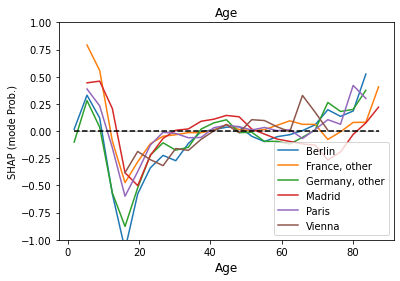

In [133]:
ax3 = plt.subplot(111)
sns.lineplot(data=df_mean_age, x='Group_mid', y='Shap_y', hue='City').set(title='Age', ylabel='SHAP (mode Prob.)')
plt.xlabel('Age',fontsize=12)
#plt.title('Car',fontsize=14)
sns.lineplot(data=df_mean_age, x='Group_mid', y='Zero',color='black',linestyle='dashed')
#ax3.get_legend().remove()
ax3.set(ylim=(-1, 1))

In [134]:
# df_combine['Group'] = pd.cut(df_combine['Feature_value'], bins=25)
# df_combine['Group_mid']=[f.mid for f in df_combine['Group']]

# l=pd.DataFrame(df_combine[['City','Group_mid']].value_counts())
# l.reset_index(inplace=True)
# l.rename(columns={0:'Group_count'},inplace=True)

# df_combine=pd.merge(df_combine,l,on=['City','Group_mid'])
# df_combine=df_combine.loc[df_combine['Group_count']>4,]
# #df_combine=df_combine.loc[df_combine['count']>50,]
# df_combine

df_pdens_summ=df_pdens.copy()
df_pdens_summ['Group'] = pd.cut(df_pdens_summ['Feature_value'], bins=25)
df_pdens_summ['Group_mid']=[f.mid for f in df_pdens_summ['Group']]

l=pd.DataFrame(df_pdens_summ[['City','Group_mid']].value_counts())
l.reset_index(inplace=True)
l.rename(columns={0:'Group_count'},inplace=True)

df_pdens_summ=pd.merge(df_pdens_summ,l,on=['City','Group_mid'])
#df_d2c_summ=df_d2c_summ.loc[df_d2c_summ['Group_count']>4,]

# get mean values per bin
df_mean_pdens=pd.DataFrame(df_pdens_summ.groupby(['City','Feature','Mode','Group_mid'])['Shap_y'].mean())
df_mean_pdens.reset_index(inplace=True)
df_mean_pdens['Zero']=0
df_mean_pdens

,City,Feature,Mode,Group_mid,Shap_y,Zero
0,Berlin,UrbPopDensity_res,Car,1310.0730,0.092699,0
1,Berlin,UrbPopDensity_res,Car,3882.8835,0.017046,0
2,Berlin,UrbPopDensity_res,Car,6423.9305,0.033650,0
3,Berlin,UrbPopDensity_res,Car,8964.9775,0.012343,0
4,Berlin,UrbPopDensity_res,Car,11506.0245,-0.062262,0
...,...,...,...,...,...,...
73,Vienna,UrbPopDensity_res,Car,14047.0715,-0.278507,0
74,Vienna,UrbPopDensity_res,Car,16588.1185,-0.288695,0
75,Vienna,UrbPopDensity_res,Car,19129.1655,-0.307825,0
76,Vienna,UrbPopDensity_res,Car,21670.2125,-0.280920,0


[(-1.0, 1.0)]

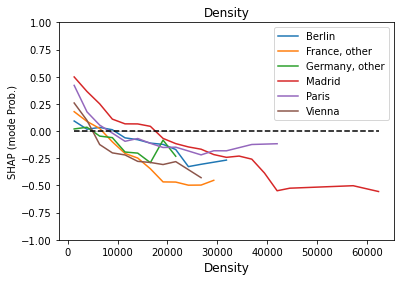

In [136]:
ax3 = plt.subplot(111)
sns.lineplot(data=df_mean_pdens, x='Group_mid', y='Shap_y', hue='City').set(title='Density', ylabel='SHAP (mode Prob.)')
plt.xlabel('Density',fontsize=12)
#plt.title('Car',fontsize=14)
sns.lineplot(data=df_mean_pdens, x='Group_mid', y='Zero',color='black',linestyle='dashed')
#ax3.get_legend().remove()
ax3.set(ylim=(-1, 1))

In [37]:
df_combine['Feature_value']=df_combine['Feature_value'].astype(int)
df_combine0=df_combine.copy()

In [23]:
df_Wien=df_combine.loc[df_combine['City']=='Vienna',]

In [25]:
df_Wien['Feature_value'].describe()

count      864.000000
mean     11301.435185
std      11626.348757
min         50.000000
25%       2882.500000
50%       7215.000000
75%      15745.000000
max      50000.000000
Name: Feature_value, dtype: float64

In [90]:
# summarise by binned values, # pop density
#b=[w for w in range(-1,110,3)]
df_combine['Group'] = pd.cut(df_combine['Feature_value'], bins=25)
df_combine['Group_mid']=[f.mid for f in df_combine['Group']]

l=pd.DataFrame(df_combine[['City','Group_mid']].value_counts())
l.reset_index(inplace=True)
l.rename(columns={0:'Group_count'},inplace=True)

df_combine=pd.merge(df_combine,l,on=['City','Group_mid'])
df_combine=df_combine.loc[df_combine['Group_count']>4,]
#df_combine=df_combine.loc[df_combine['count']>50,]
df_combine

,City,Feature,Mode,Feature_value,Shap_y,Zero,count,Group,Group_mid,Group_count
0,Berlin,UrbPopDensity_origin,Car,106.759623,0.090856,0,9.0,"(8.672, 2669.041]",1338.8565,108
1,Berlin,UrbPopDensity_origin,Car,639.898501,0.040695,0,22.0,"(8.672, 2669.041]",1338.8565,108
2,Berlin,UrbPopDensity_origin,Car,770.16885,0.084445,0,16.0,"(8.672, 2669.041]",1338.8565,108
3,Berlin,UrbPopDensity_origin,Car,1408.193789,0.072994,0,104.0,"(8.672, 2669.041]",1338.8565,108
4,Berlin,UrbPopDensity_origin,Car,1453.296615,0.113069,0,521.0,"(8.672, 2669.041]",1338.8565,108
...,...,...,...,...,...,...,...,...,...,...
6959,Vienna,UrbPopDensity_origin,Foot,20221.388714,0.059037,0,130.0,"(18241.934, 20837.416]",19539.6750,16
6960,Vienna,UrbPopDensity_origin,Transit,18703.892611,0.180399,0,122.0,"(18241.934, 20837.416]",19539.6750,16
6961,Vienna,UrbPopDensity_origin,Transit,19302.677503,0.212637,0,198.0,"(18241.934, 20837.416]",19539.6750,16
6962,Vienna,UrbPopDensity_origin,Transit,19820.191354,0.208262,0,178.0,"(18241.934, 20837.416]",19539.6750,16


In [66]:
# summarise by binned values, # d2c
b=[w for w in range(0,40,1)]
df_combine['Group'] = pd.cut(df_combine['Feature_value'], bins=b)
df_combine['Group_mid']=[f.mid for f in df_combine['Group']]

l=pd.DataFrame(df_combine[['City','Group_mid']].value_counts())
l.reset_index(inplace=True)
l.rename(columns={0:'Group_count'},inplace=True)

df_combine=pd.merge(df_combine,l,on=['City','Group_mid'])
#df_combine=df_combine.loc[df_combine['Group_count']>8,]
#df_combine=df_combine.loc[df_combine['count']>50,]
df_combine

,City,Feature,Mode,Feature_value,Shap_y,Zero,count,Group,Group_mid,Group_count
4,Berlin,DistCenter_origin,Car,1.425153,-0.16813,0,136.0,"(1, 2]",1.5,20
5,Berlin,DistCenter_origin,Car,1.468585,-0.169223,0,149.0,"(1, 2]",1.5,20
6,Berlin,DistCenter_origin,Car,1.677932,-0.162086,0,130.0,"(1, 2]",1.5,20
7,Berlin,DistCenter_origin,Car,1.73502,-0.279563,0,283.0,"(1, 2]",1.5,20
8,Berlin,DistCenter_origin,Car,1.972959,-0.449867,0,388.0,"(1, 2]",1.5,20
...,...,...,...,...,...,...,...,...,...,...
17439,Vienna,DistCenter_origin,Foot,14.992805,-0.07302,0,5.0,"(14, 15]",14.5,16
17440,Vienna,DistCenter_origin,Transit,14.533817,-0.394468,0,83.0,"(14, 15]",14.5,16
17441,Vienna,DistCenter_origin,Transit,14.642531,-0.598233,0,44.0,"(14, 15]",14.5,16
17442,Vienna,DistCenter_origin,Transit,14.876256,-0.831032,0,54.0,"(14, 15]",14.5,16


In [72]:
# summarise by binned values, # trip distance
df_combine=df_combine0.copy()
#b=[w for w in range(-1,110,3)]
#df_combine['Group'] = pd.cut(df_combine['Feature_value'], bins=25)
df_combine['Group'] = pd.qcut(df_combine['Feature_value'], q=22)
df_combine['Group_mid']=[f.mid for f in df_combine['Group']]

l=pd.DataFrame(df_combine[['City','Group_mid']].value_counts())
l.reset_index(inplace=True)
l.rename(columns={0:'Group_count'},inplace=True)

df_combine=pd.merge(df_combine,l,on=['City','Group_mid'])
df_combine=df_combine.loc[df_combine['Group_count']>20,]
#df_combine=df_combine.loc[df_combine['count']>50,]
df_combine

,City,Feature,Mode,Feature_value,Shap_y,Zero,count,Group,Group_mid,Group_count
0,Berlin,Trip_Distance,Car,51,-2.387546,0,2.0,"(49.999, 284.0]",166.9995,884
1,Berlin,Trip_Distance,Car,52,-3.714372,0,6.0,"(49.999, 284.0]",166.9995,884
2,Berlin,Trip_Distance,Car,53,-3.529686,0,8.0,"(49.999, 284.0]",166.9995,884
3,Berlin,Trip_Distance,Car,54,-3.985677,0,4.0,"(49.999, 284.0]",166.9995,884
4,Berlin,Trip_Distance,Car,55,-3.692867,0,6.0,"(49.999, 284.0]",166.9995,884
...,...,...,...,...,...,...,...,...,...,...
126795,Vienna,Trip_Distance,Transit,46000,0.441776,0,3.0,"(17130.409, 50000.0]",33565.2045,184
126796,Vienna,Trip_Distance,Transit,48000,-0.384111,0,3.0,"(17130.409, 50000.0]",33565.2045,184
126797,Vienna,Trip_Distance,Transit,48590,0.37173,0,3.0,"(17130.409, 50000.0]",33565.2045,184
126798,Vienna,Trip_Distance,Transit,49000,-0.361242,0,2.0,"(17130.409, 50000.0]",33565.2045,184


In [77]:
# summarise by binned values, # trip distance
#b=[w for w in range(-1,110,3)]
df_combine['Group'] = pd.cut(df_combine['Feature_value'], bins=25)
df_combine['Group_mid']=[f.mid for f in df_combine['Group']]

l=pd.DataFrame(df_combine[['City','Group_mid']].value_counts())
l.reset_index(inplace=True)
l.rename(columns={0:'Group_count'},inplace=True)

df_combine=pd.merge(df_combine,l,on=['City','Group_mid'])
df_combine=df_combine.loc[df_combine['Group_count']>40,]
#df_combine=df_combine.loc[df_combine['count']>50,]
df_combine

,City,Feature,Mode,Feature_value,Shap_y,Zero,count,Group,Group_mid,Group_count
0,Berlin,UrbPopDensity_origin,Car,106.759623,0.090856,0,9.0,"(8.672, 2669.041]",1338.8565,108
1,Berlin,UrbPopDensity_origin,Car,639.898501,0.040695,0,22.0,"(8.672, 2669.041]",1338.8565,108
2,Berlin,UrbPopDensity_origin,Car,770.16885,0.084445,0,16.0,"(8.672, 2669.041]",1338.8565,108
3,Berlin,UrbPopDensity_origin,Car,1408.193789,0.072994,0,104.0,"(8.672, 2669.041]",1338.8565,108
4,Berlin,UrbPopDensity_origin,Car,1453.296615,0.113069,0,521.0,"(8.672, 2669.041]",1338.8565,108
...,...,...,...,...,...,...,...,...,...,...
6871,Vienna,UrbPopDensity_origin,Transit,1996.336551,-0.393571,0,92.0,"(8.672, 2669.041]",1338.8565,80
6872,Vienna,UrbPopDensity_origin,Transit,2002.036768,-0.472465,0,54.0,"(8.672, 2669.041]",1338.8565,80
6873,Vienna,UrbPopDensity_origin,Transit,2212.20272,-0.420149,0,20.0,"(8.672, 2669.041]",1338.8565,80
6874,Vienna,UrbPopDensity_origin,Transit,2306.125434,-0.433735,0,558.0,"(8.672, 2669.041]",1338.8565,80


In [3]:
# summarise by binned values, # Age
b=[w for w in range(-1,110,3)]
df_combine['Group'] = pd.cut(df_combine['Feature_value'], bins=b)
df_combine['Group_mid']=[f.mid for f in df_combine['Group']]
df_combine


,City,Feature,Mode,Feature_value,Shap_y,Zero,count,Group,Group_mid
0,Berlin,Age,Car,0,-0.368864,0,489.0,"(-1, 2]",0.5
1,Berlin,Age,Car,1,-0.014208,0,666.0,"(-1, 2]",0.5
2,Berlin,Age,Car,2,0.248679,0,494.0,"(-1, 2]",0.5
3,Berlin,Age,Car,3,0.269189,0,503.0,"(2, 5]",3.5
4,Berlin,Age,Car,4,0.339299,0,496.0,"(2, 5]",3.5
...,...,...,...,...,...,...,...,...,...
1871,Vienna,Age,Transit,71,-0.339254,0,118.0,"(68, 71]",69.5
1872,Vienna,Age,Transit,72,-0.354948,0,131.0,"(71, 74]",72.5
1873,Vienna,Age,Transit,73,-0.375598,0,135.0,"(71, 74]",72.5
1874,Vienna,Age,Transit,74,-0.398475,0,121.0,"(71, 74]",72.5


In [73]:
# get mean values per bin
df_mean=pd.DataFrame(df_combine.groupby(['City','Feature','Mode','Group_mid'])['Shap_y'].mean())
df_mean.reset_index(inplace=True)
df_mean['Zero']=0
if feature_label=='Trip Distance (km)':
    df_mean['Group_mid']=0.001*df_mean['Group_mid']
df_mean

,City,Feature,Mode,Group_mid,Shap_y,Zero
0,Berlin,Trip_Distance,Bike,0.167000,-0.914449,0
1,Berlin,Trip_Distance,Bike,0.381500,-0.271879,0
2,Berlin,Trip_Distance,Bike,0.585000,0.327617,0
3,Berlin,Trip_Distance,Bike,0.817500,0.530107,0
4,Berlin,Trip_Distance,Bike,1.092000,0.558361,0
...,...,...,...,...,...,...
503,Vienna,Trip_Distance,Transit,8.834000,0.332494,0
504,Vienna,Trip_Distance,Transit,10.359000,1.020711,0
505,Vienna,Trip_Distance,Transit,12.382818,0.717304,0
506,Vienna,Trip_Distance,Transit,15.339022,0.377188,0


In [70]:
df_combine.Group.value_counts()

(49.999, 233.0]       4232
(15187.0, 18638.0]    4228
(12990.3, 15187.0]    4228
(851.0, 1059.0]       4228
(8925.0, 10006.0]     4228
(8027.0, 8925.0]      4228
(7257.0, 8027.0]      4228
(6615.3, 7257.0]      4228
(2639.0, 2973.0]      4228
(5484.0, 6011.0]      4228
(4110.0, 4531.0]      4228
(233.0, 373.0]        4224
(11342.0, 12990.3]    4224
(10006.0, 11342.0]    4224
(6011.0, 6615.3]      4224
(18638.0, 50000.0]    4224
(3327.0, 3704.0]      4224
(1764.0, 2038.0]      4224
(4531.0, 4988.4]      4220
(2038.0, 2331.0]      4220
(1283.0, 1514.0]      4220
(675.0, 851.0]        4220
(373.0, 521.0]        4220
(4988.4, 5484.0]      4212
(2973.0, 3327.0]      4212
(3704.0, 4110.0]      4212
(2331.0, 2639.0]      4204
(1059.0, 1283.0]      4204
(1514.0, 1764.0]      4200
(521.0, 675.0]        4188
Name: Group, dtype: int64

[(-1.5, 1.5)]

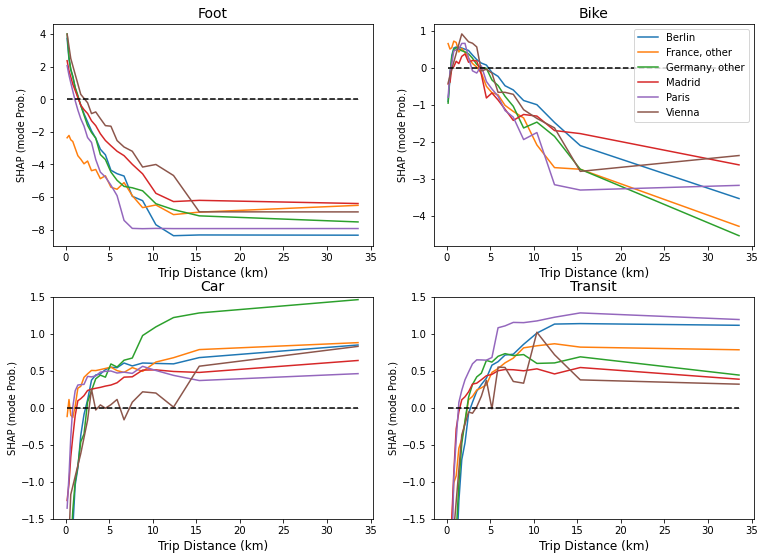

In [76]:
# plot binned values, with subplots per mode and values for each city in each subplot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(11,8))
fig.tight_layout(pad=3.0)

ax1 = plt.subplot(221)
sns.lineplot(data=df_mean.loc[df_mean['Mode']=='Foot',], x='Group_mid', y='Shap_y', hue='City').set(title='Foot',ylabel='SHAP (mode Prob.)')
plt.xlabel(feature_label,fontsize=12)
plt.title('Foot',fontsize=14)
sns.lineplot(data=df_mean.loc[df_mean['Mode']=='Foot',], x='Group_mid', y='Zero',color='black',linestyle='dashed')
ax1.get_legend().remove()

ax2 = plt.subplot(222)
sns.lineplot(data=df_mean.loc[df_mean['Mode']=='Bike',], x='Group_mid', y='Shap_y', hue='City').set(title='Bike', ylabel='SHAP (mode Prob.)')
plt.xlabel(feature_label,fontsize=12)
plt.title('Bike',fontsize=14)
sns.lineplot(data=df_mean.loc[df_mean['Mode']=='Bike',], x='Group_mid', y='Zero',color='black',linestyle='dashed')
#ax2.get_legend().remove()

ax3 = plt.subplot(223)
sns.lineplot(data=df_mean.loc[df_mean['Mode']=='Car',], x='Group_mid', y='Shap_y', hue='City').set(title='Car', ylabel='SHAP (mode Prob.)')
plt.xlabel(feature_label,fontsize=12)
plt.title('Car',fontsize=14)
sns.lineplot(data=df_mean.loc[df_mean['Mode']=='Car',], x='Group_mid', y='Zero',color='black',linestyle='dashed')
ax3.get_legend().remove()
ax3.set(ylim=(-1.5, 1.5))

ax4 = plt.subplot(224)
sns.lineplot(data=df_mean.loc[df_mean['Mode']=='Transit',], x='Group_mid', y='Shap_y', hue='City').set(title='Transit', ylabel='SHAP (mode Prob.)')
plt.xlabel(feature_label,fontsize=12)
plt.title('Transit',fontsize=14)
sns.lineplot(data=df_mean.loc[df_mean['Mode']=='Transit',], x='Group_mid', y='Zero',color='black',linestyle='dashed')
ax4.get_legend().remove()
ax4.set(ylim=(-1.5, 1.5))

#plt.savefig('../outputs/ML_Results/result_figures/mode_common_new/' + feature_label.replace(' (km)','') +  '_all_bin.png',facecolor='w',dpi=300,bbox_inches='tight')
# plt.close() 

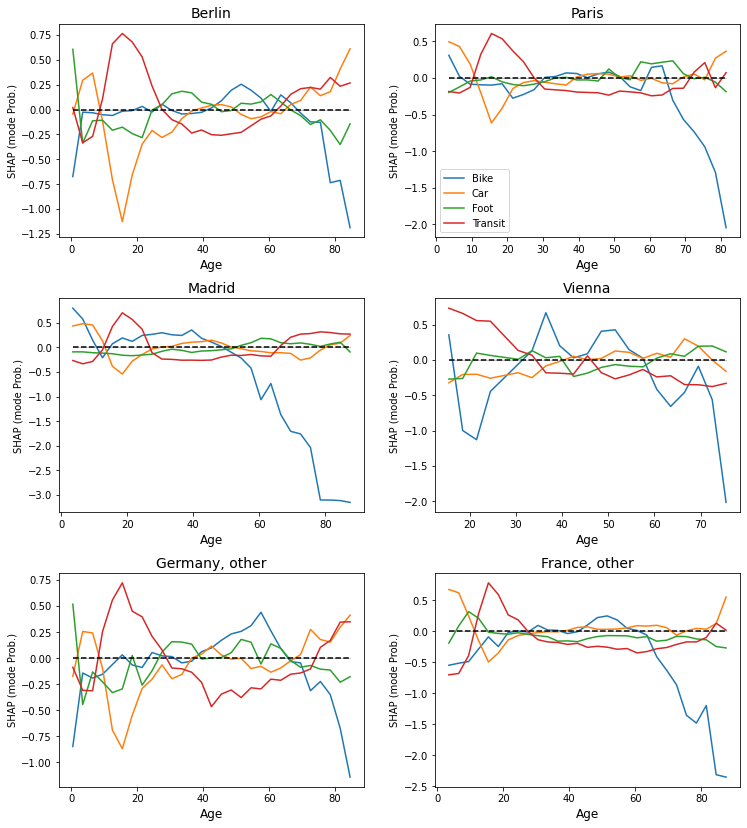

In [7]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(11,12))
fig.tight_layout(pad=4.0)

ax1 = plt.subplot(321)
sns.lineplot(data=df_mean.loc[df_mean['City']=='Berlin',], x='Group_mid', y='Shap_y', hue='Mode').set(ylabel='SHAP (mode Prob.)')
plt.xlabel(feature_label, fontsize=12)
sns.lineplot(data=df_mean.loc[df_mean['City']=='Berlin',], x='Group_mid', y='Zero',color='black',linestyle='dashed')
if feature_label=='Trip Distance (km)': plt.ylim(-3,3)
plt.title('Berlin',fontsize=14)
ax1.get_legend().remove()

ax2 = plt.subplot(322)
sns.lineplot(data=df_mean.loc[df_mean['City']=='Paris',], x='Group_mid', y='Shap_y', hue='Mode').set(ylabel='SHAP (mode Prob.)')
plt.xlabel(feature_label, fontsize=12)
sns.lineplot(data=df_mean.loc[df_mean['City']=='Paris',], x='Group_mid', y='Zero',color='black',linestyle='dashed')
if feature_label=='Trip Distance (km)': plt.ylim(-3,3)
plt.title('Paris',fontsize=14)
#ax2.get_legend().remove()

ax3 = plt.subplot(323)
sns.lineplot(data=df_mean.loc[df_mean['City']=='Madrid',], x='Group_mid', y='Shap_y', hue='Mode').set(ylabel='SHAP (mode Prob.)')
plt.xlabel(feature_label, fontsize=12)
sns.lineplot(data=df_mean.loc[df_mean['City']=='Madrid',], x='Group_mid', y='Zero',color='black',linestyle='dashed')
if feature_label=='Trip Distance (km)': plt.ylim(-3,3)
plt.title('Madrid',fontsize=14)
ax3.get_legend().remove()

ax4 = plt.subplot(324)
sns.lineplot(data=df_mean.loc[df_mean['City']=='Vienna',], x='Group_mid', y='Shap_y', hue='Mode').set(ylabel='SHAP (mode Prob.)')
plt.xlabel(feature_label, fontsize=12)
sns.lineplot(data=df_mean.loc[df_mean['City']=='Vienna',], x='Group_mid', y='Zero',color='black',linestyle='dashed')
if feature_label=='Trip Distance (km)': plt.ylim(-3,3)
plt.title('Vienna',fontsize=14)
ax4.get_legend().remove()

ax5 = plt.subplot(325)
sns.lineplot(data=df_mean.loc[df_mean['City']=='Germany, other',], x='Group_mid', y='Shap_y', hue='Mode').set(ylabel='SHAP (mode Prob.)')
plt.xlabel(feature_label, fontsize=12)
sns.lineplot(data=df_mean.loc[df_mean['City']=='Germany, other',], x='Group_mid', y='Zero',color='black',linestyle='dashed')
if feature_label=='Trip Distance (km)': plt.ylim(-3,3)
plt.title('Germany, other',fontsize=14)
ax5.get_legend().remove()

ax6 = plt.subplot(326)
sns.lineplot(data=df_mean.loc[df_mean['City']=='France, other',], x='Group_mid', y='Shap_y', hue='Mode').set(ylabel='SHAP (mode Prob.)')
plt.xlabel(feature_label, fontsize=12)
sns.lineplot(data=df_mean.loc[df_mean['City']=='France, other',], x='Group_mid', y='Zero',color='black',linestyle='dashed')
if feature_label=='Trip Distance (km)': plt.ylim(-3,3)
plt.title('France, other',fontsize=14)
ax6.get_legend().remove()
plt.savefig('../outputs/ML_Results/result_figures/mode_common_new/' + feature_label.replace(' (km)','') +  '_city_bin.png',facecolor='w',dpi=300,bbox_inches='tight')
# plt.close() 